In [4]:
#import libraries
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore') # if there are any warning due to version mismatch, it will be ignored

In [3]:
#load dataset
IMDB_df = pd.read_csv('imdb.csv')
IMDB_df

,Name,Date,Rate,Votes,Genre,Duration,Type,Certificate,Episodes,Nudity,Violence,Profanity,Alcohol,Frightening
0,No Time to Die,2021,7.6,"107,163","Action, Adventure, Thriller",163,Film,PG-13,-,Mild,Moderate,Mild,Mild,Moderate
1,The Guilty,2021,6.3,"64,375","Crime, Drama, Thriller",90,Film,R,-,None,None,Severe,None,Moderate
2,The Many Saints of Newark,2021,6.4,"27,145","Crime, Drama",120,Film,R,-,Moderate,Severe,Severe,Moderate,Moderate
3,Venom: Let There Be Carnage,2021,6.4,"30,443","Action, Adventure, Sci-Fi",97,Film,PG-13,-,None,Moderate,Moderate,Mild,Moderate
4,Dune,2021,8.3,"84,636","Action, Adventure, Drama",155,Film,PG-13,-,None,Moderate,None,Mild,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6173,The Human Centipede II (Full Sequence),2011,3.8,"37,492",Horror,91,Film,Not Rated,-,Severe,Severe,Severe,Mild,Severe
6174,Double Indemnity,1944,8.3,"150,448","Crime, Drama, Film-Noir",107,Film,Passed,-,None,Mild,None,Mild,Mild
6175,Before the Devil Knows You're Dead,2007,7.3,"100,668","Crime, Drama, Thriller",117,Film,R,-,Severe,Moderate,Severe,Severe,Severe
6176,Queen Bees,2021,6.0,887,"Comedy, Drama, Romance",100,Film,PG-13,-,None,None,Mild,Moderate,None


In [5]:
IMDB_df.shape

(6178, 14)

In [6]:
IMDB_df.columns

Index(['Name', 'Date', 'Rate', 'Votes', 'Genre', 'Duration', 'Type',
       'Certificate', 'Episodes', 'Nudity', 'Violence', 'Profanity', 'Alcohol',
       'Frightening'],
      dtype='object')

In [7]:
IMDB_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6178 entries, 0 to 6177
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         6178 non-null   object
 1   Date         6178 non-null   int64 
 2   Rate         6178 non-null   object
 3   Votes        6178 non-null   object
 4   Genre        6178 non-null   object
 5   Duration     6178 non-null   object
 6   Type         6178 non-null   object
 7   Certificate  6178 non-null   object
 8   Episodes     6178 non-null   object
 9   Nudity       6178 non-null   object
 10  Violence     6178 non-null   object
 11  Profanity    6178 non-null   object
 12  Alcohol      6178 non-null   object
 13  Frightening  6178 non-null   object
dtypes: int64(1), object(13)
memory usage: 675.8+ KB


In [8]:
'''
Used for calculating some statistical data like percentile,
mean and std of the numerical values
'''
IMDB_df.describe()

,Date
count,6178.000000
mean,2005.952574
std,15.910248
min,1922.000000
25%,1998.000000
50%,2011.000000
75%,2019.000000
max,2023.000000


In [9]:
'''
This will include count, unique, top and freq. 
The top is the most common value. 
The freq is the most common value’s frequency.
'''
IMDB_df.describe(include = 'object')

,Name,Rate,Votes,Genre,Duration,Type,Certificate,Episodes,Nudity,Violence,Profanity,Alcohol,Frightening
count,6178,6178,6178,6178,6178,6178,6178,6178,6178,6178,6178,6178,6178
unique,4820,77,4802,377,203,2,23,284,5,5,5,5,5
top,King Kong,7.3,No Votes,Comedy,60,Film,R,-,Mild,Moderate,Mild,Mild,Moderate
freq,5,273,185,268,352,4446,1885,4446,2292,1814,2077,3257,1969


In [10]:
IMDB_df.Name=='King Kong'

0       False
1       False
2       False
3       False
4       False
        ...  
6173    False
6174    False
6175    False
6176    False
6177    False
Name: Name, Length: 6178, dtype: bool

In [11]:
KingKong_data = IMDB_df.loc[IMDB_df.Name=='King Kong'] 
KingKong_data

,Name,Date,Rate,Votes,Genre,Duration,Type,Certificate,Episodes,Nudity,Violence,Profanity,Alcohol,Frightening
2084,King Kong,2005,7.2,"407,876","Action, Adventure, Drama",187,Film,PG-13,-,Mild,Moderate,Mild,Mild,Moderate
4207,King Kong,1976,5.9,"31,536","Adventure, Horror",134,Film,PG,-,Mild,Moderate,Mild,Mild,Moderate
4951,King Kong,1933,7.9,"82,705","Adventure, Horror, Sci-Fi",100,Film,Passed,-,Mild,Moderate,None,Mild,Moderate
5357,King Kong,1976,5.9,"31,536","Adventure, Horror",134,Film,PG,-,Mild,Moderate,Mild,Mild,Moderate
6101,King Kong,1933,7.9,"82,705","Adventure, Horror, Sci-Fi",100,Film,Passed,-,Mild,Moderate,None,Mild,Moderate


In [12]:
#Finding Columns with Missing Values
IMDB_df.isna().any()

Name           False
Date           False
Rate           False
Votes          False
Genre          False
Duration       False
Type           False
Certificate    False
Episodes       False
Nudity         False
Violence       False
Profanity      False
Alcohol        False
Frightening    False
dtype: bool

In [40]:
for i in range(0,IMDB_df.shape[0]):
    IMDB_df['Votes'][i] = IMDB_df['Votes'][i].replace(',', '')

IMDB_df['Votes']

AttributeError: 'numpy.float64' object has no attribute 'replace'

In [36]:
IMDB_df['Rate'] = pd.to_numeric(IMDB_df['Rate'], errors='coerce', downcast="integer")
IMDB_df['Votes'] = pd.to_numeric(IMDB_df['Votes'], errors='coerce', downcast="integer")
IMDB_df['Duration'] = pd.to_numeric(IMDB_df['Duration'], errors='coerce', downcast="integer")

In [37]:
IMDB_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6178 entries, 0 to 6177
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         6178 non-null   object 
 1   Date         6178 non-null   int64  
 2   Rate         6178 non-null   float64
 3   Votes        6178 non-null   int32  
 4   Genre        6178 non-null   object 
 5   Duration     6178 non-null   int16  
 6   Type         6178 non-null   object 
 7   Certificate  6178 non-null   object 
 8   Episodes     6178 non-null   object 
 9   Nudity       6178 non-null   object 
 10  Violence     6178 non-null   object 
 11  Profanity    6178 non-null   object 
 12  Alcohol      6178 non-null   object 
 13  Frightening  6178 non-null   object 
dtypes: float64(1), int16(1), int32(1), int64(1), object(10)
memory usage: 615.5+ KB


In [38]:
IMDB_df.isnull().sum()

Name           0
Date           0
Rate           0
Votes          0
Genre          0
Duration       0
Type           0
Certificate    0
Episodes       0
Nudity         0
Violence       0
Profanity      0
Alcohol        0
Frightening    0
dtype: int64

In [39]:
IMDB_df['Rate'] = IMDB_df['Rate'].replace(np.nan, 0)
IMDB_df['Votes'] = IMDB_df['Votes'].replace(np.nan, 0)
IMDB_df['Duration'] = IMDB_df['Duration'].replace(np.nan, 0)

In [40]:
IMDB_df.isna().sum()

Name           0
Date           0
Rate           0
Votes          0
Genre          0
Duration       0
Type           0
Certificate    0
Episodes       0
Nudity         0
Violence       0
Profanity      0
Alcohol        0
Frightening    0
dtype: int64

In [41]:
#Again describe
IMDB_df.describe()

,Date,Rate,Votes,Duration
count,6178.000000,6178.000000,6.178000e+03,6178.000000
mean,2005.952574,6.670751,1.186994e+05,89.969084
std,15.910248,1.584147,1.912752e+05,45.541366
min,1922.000000,0.000000,0.000000e+00,0.000000
25%,1998.000000,6.200000,1.221275e+04,60.000000
50%,2011.000000,6.900000,5.364250e+04,98.000000
75%,2019.000000,7.600000,1.437282e+05,115.000000
max,2023.000000,9.700000,2.474122e+06,900.000000


In [20]:
IMDB_df.describe(include = 'object')

,Name,Genre,Type,Certificate,Episodes,Nudity,Violence,Profanity,Alcohol,Frightening
count,6178,6178,6178,6178,6178,6178,6178,6178,6178,6178
unique,4820,377,2,23,284,5,5,5,5,5
top,King Kong,Comedy,Film,R,-,Mild,Moderate,Mild,Mild,Moderate
freq,5,268,4446,1885,4446,2292,1814,2077,3257,1969


In [42]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [23]:
IMDB_df

,Name,Date,Rate,Votes,Genre,Duration,Type,Certificate,Episodes,Nudity,Violence,Profanity,Alcohol,Frightening
0,No Time to Die,2021,7.6,107163.0,"Action, Adventure, Thriller",163.0,Film,PG-13,-,Mild,Moderate,Mild,Mild,Moderate
1,The Guilty,2021,6.3,64375.0,"Crime, Drama, Thriller",90.0,Film,R,-,None,None,Severe,None,Moderate
2,The Many Saints of Newark,2021,6.4,27145.0,"Crime, Drama",120.0,Film,R,-,Moderate,Severe,Severe,Moderate,Moderate
3,Venom: Let There Be Carnage,2021,6.4,30443.0,"Action, Adventure, Sci-Fi",97.0,Film,PG-13,-,None,Moderate,Moderate,Mild,Moderate
4,Dune,2021,8.3,84636.0,"Action, Adventure, Drama",155.0,Film,PG-13,-,None,Moderate,None,Mild,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6173,The Human Centipede II (Full Sequence),2011,3.8,37492.0,Horror,91.0,Film,Not Rated,-,Severe,Severe,Severe,Mild,Severe
6174,Double Indemnity,1944,8.3,150448.0,"Crime, Drama, Film-Noir",107.0,Film,Passed,-,None,Mild,None,Mild,Mild
6175,Before the Devil Knows You're Dead,2007,7.3,100668.0,"Crime, Drama, Thriller",117.0,Film,R,-,Severe,Moderate,Severe,Severe,Severe
6176,Queen Bees,2021,6.0,887.0,"Comedy, Drama, Romance",100.0,Film,PG-13,-,None,None,Mild,Moderate,None


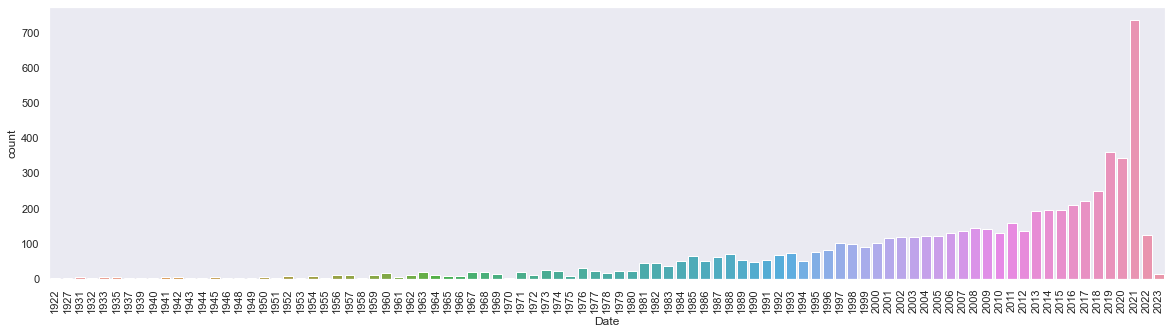

In [24]:
plt.figure(figsize=(20,5))
sns.set(style='dark')
sns.countplot(IMDB_df['Date'].sort_values(ascending=False))
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='Rate', ylabel='Count'>

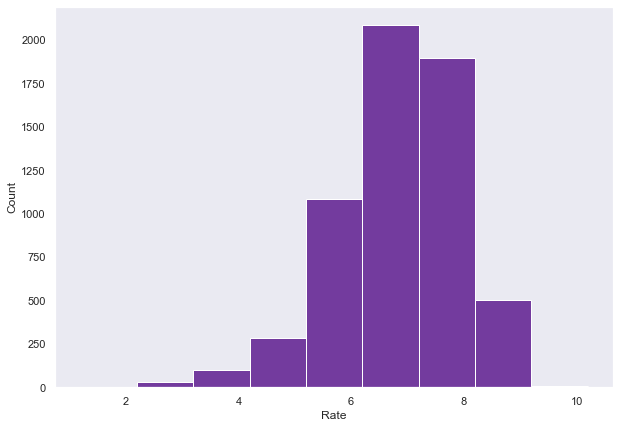

In [25]:
plt.figure(figsize=(10,7))
sns.set(style='dark')
sns.histplot(data=IMDB_df,x='Rate',color='indigo',binwidth=1)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]),
 [Text(0, 0, 'PG-13'),
  Text(1, 0, 'R'),
  Text(2, 0, 'TV-MA'),
  Text(3, 0, 'None'),
  Text(4, 0, 'TV-14'),
  Text(5, 0, 'TV-PG'),
  Text(6, 0, 'PG'),
  Text(7, 0, 'TV-G'),
  Text(8, 0, '(Banned)'),
  Text(9, 0, 'Not Rated'),
  Text(10, 0, 'E'),
  Text(11, 0, 'NC-17'),
  Text(12, 0, 'TV-Y7-FV'),
  Text(13, 0, 'TV-Y7'),
  Text(14, 0, 'Unrated'),
  Text(15, 0, 'Approved'),
  Text(16, 0, 'G'),
  Text(17, 0, 'TV-Y'),
  Text(18, 0, 'GP'),
  Text(19, 0, 'Passed'),
  Text(20, 0, 'M'),
  Text(21, 0, 'X'),
  Text(22, 0, 'M/PG')])

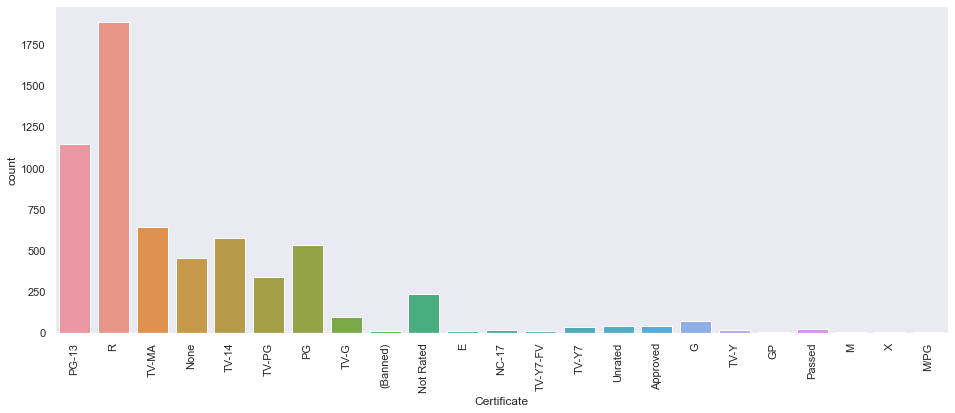

In [26]:
plt.figure(figsize=(16, 6))
plot = sns.countplot(x='Certificate', data=IMDB_df);
plt.xticks(rotation = 90)

In [27]:
# Let's examin on PG-13 movie data.
PG13_Certificate = IMDB_df.loc[IMDB_df.Certificate=='PG-13'] 
PG13_Certificate

,Name,Date,Rate,Votes,Genre,Duration,Type,Certificate,Episodes,Nudity,Violence,Profanity,Alcohol,Frightening
0,No Time to Die,2021,7.6,107163.0,"Action, Adventure, Thriller",163.0,Film,PG-13,-,Mild,Moderate,Mild,Mild,Moderate
3,Venom: Let There Be Carnage,2021,6.4,30443.0,"Action, Adventure, Sci-Fi",97.0,Film,PG-13,-,None,Moderate,Moderate,Mild,Moderate
4,Dune,2021,8.3,84636.0,"Action, Adventure, Drama",155.0,Film,PG-13,-,None,Moderate,None,Mild,Moderate
6,Free Guy,2021,7.3,153835.0,"Action, Adventure, Comedy",115.0,Film,PG-13,-,Mild,Moderate,Moderate,None,Mild
19,Black Widow,2021,6.8,246603.0,"Action, Adventure, Sci-Fi",134.0,Film,PG-13,-,None,Moderate,Mild,Mild,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6148,Dumb and Dumber To,2014,5.6,133162.0,Comedy,109.0,Film,PG-13,-,Moderate,Mild,Moderate,Mild,Mild
6151,Alpha,2018,6.7,59238.0,"Action, Adventure, Drama",96.0,Film,PG-13,-,None,Mild,None,None,Moderate
6153,Tenki no ko,2019,7.5,31527.0,"Animation, Drama, Fantasy",112.0,Film,PG-13,-,Mild,Mild,Mild,Mild,Mild
6165,The Family Man,2000,6.8,106632.0,"Comedy, Drama, Fantasy",125.0,Film,PG-13,-,Mild,None,Mild,Mild,None


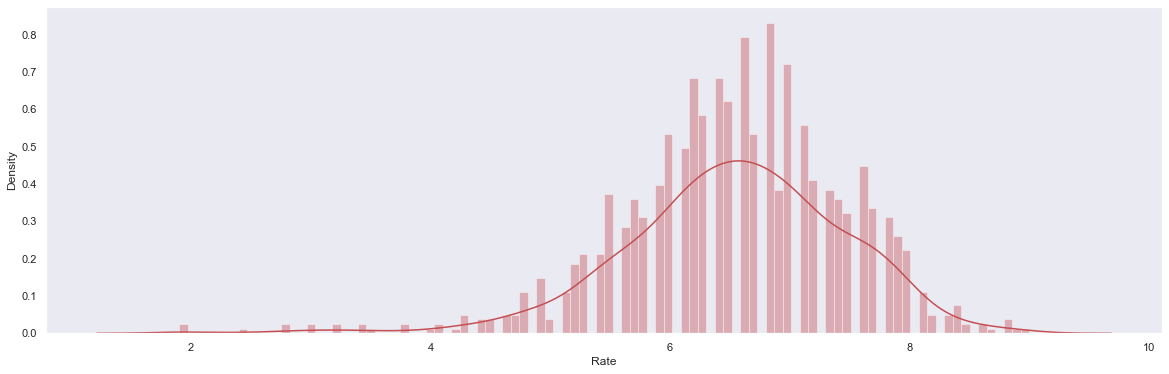

In [28]:
plt.figure(figsize=(20, 6))
plot = sns.distplot(PG13_Certificate['Rate'], color='r', bins=100)

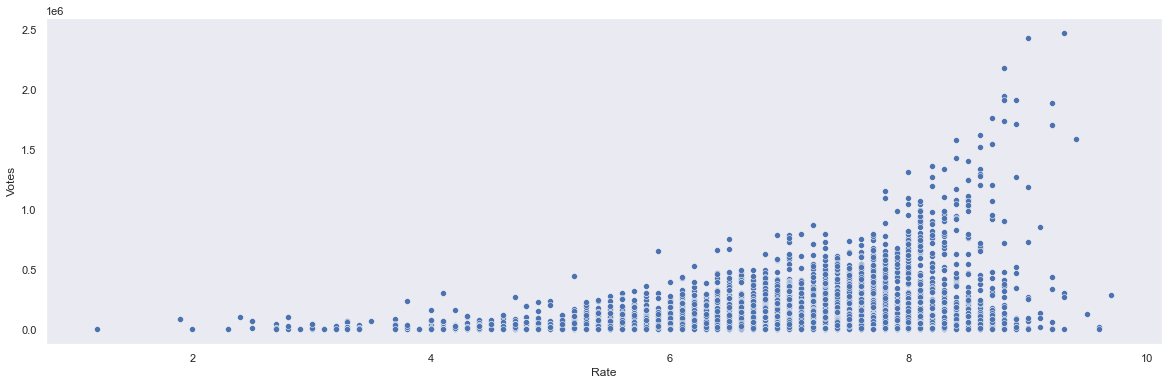

In [29]:
plt.figure(figsize=(20, 6))
sns.scatterplot(x=IMDB_df.Rate, y=IMDB_df.Votes);

In [43]:
correlations = IMDB_df.corr()

<AxesSubplot:>

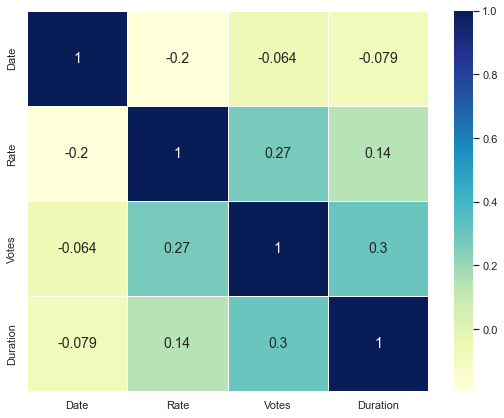

In [44]:
f,ax = plt.subplots(figsize=(9,7))
sns.heatmap(correlations, annot=True, cmap="YlGnBu", linewidths=.5)

In [32]:
Top_Rated = IMDB_df.nlargest(10, 'Rate')
Top_Rated

,Name,Date,Rate,Votes,Genre,Duration,Type,Certificate,Episodes,Nudity,Violence,Profanity,Alcohol,Frightening
1946,Aspirants,2004,9.7,286206.0,Drama,45.0,Series,None,5,No Rate,No Rate,No Rate,No Rate,No Rate
909,The Chosen,2007,9.6,21759.0,"Drama, History",54.0,Series,TV-PG,17,None,None,None,None,Mild
1754,Bluey,2005,9.6,4110.0,"Animation, Family",7.0,Series,TV-Y,147,None,None,None,None,None
2780,Scam 1992: The Harshad Mehta Story,2020,9.5,131914.0,"Biography, Crime, Drama",54.0,Series,TV-14,10,None,None,Mild,Mild,None
52,Breaking Bad,2021,9.4,1593305.0,"Crime, Drama, Thriller",49.0,Series,TV-MA,62,Mild,Severe,Moderate,Severe,Severe
109,The Wire,2021,9.3,306334.0,"Crime, Drama, Thriller",59.0,Series,TV-MA,60,Severe,Severe,Severe,Severe,Severe
201,The Shawshank Redemption,1994,9.3,2474122.0,Drama,142.0,Film,R,-,Mild,Moderate,Severe,Mild,Moderate
500,Avatar: The Last Airbender,1974,9.3,273781.0,"Animation, Action, Adventure",23.0,Series,TV-Y7-FV,62,None,Mild,None,None,Moderate
819,Toma,2021,9.3,5562.0,"Biography, Drama, Music",140.0,Film,None,-,No Rate,No Rate,No Rate,No Rate,No Rate
13,The Sopranos,2021,9.2,340006.0,"Crime, Drama",55.0,Series,TV-MA,86,Severe,Severe,Severe,Severe,Severe


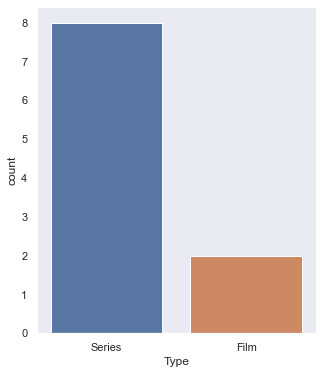

In [33]:
plt.figure(figsize=(5, 6))
plot = sns.countplot(x='Type', data=Top_Rated)

In [34]:
Top_Rated.loc[Top_Rated.Type=='Series']['Name']

1946                             Aspirants
909                             The Chosen
1754                                 Bluey
2780    Scam 1992: The Harshad Mehta Story
52                            Breaking Bad
109                               The Wire
500             Avatar: The Last Airbender
13                            The Sopranos
Name: Name, dtype: object

In [35]:
Top_Rated.loc[Top_Rated.Type=='Film']['Name']

201    The Shawshank Redemption
819                        Toma
Name: Name, dtype: object